In [1]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks')
%matplotlib inline

In [2]:
ye = pd.DataFrame({'lyrics': io.open('kanye_verses.txt', 'r', encoding='ascii', errors='ignore').read().split('\n\n')})

In [4]:
ye.head()

,lyrics
0,Let the suicide doors up\nI threw suicides on ...
1,"She said, ""'Ye, can we get married at the mall..."
2,"Break records at Louis, ate breakfast at Gucci..."
3,What you doin' in the club on a Thursday?\nShe...
4,"I wanna fuck you hard on the sink\nAfter that,..."


In [5]:
ye.loc[0, 'lyrics']

"Let the suicide doors up\nI threw suicides on the tour bus\nI threw suicides on the private jet\nYou know what that mean, I'm fly to death\nI step in Def Jam buildin' like I'm the shit\nTell 'em give me fifty million or I'ma quit\nMost rappers' taste level ain't at my waist level\nTurn up the bass 'til it's up-in-yo-face level\nDon't do no press but I get the most press kit\nPlus, yo, my bitch make your bitch look like Precious\nSomethin' 'bout Mary, she gone off that molly\nNow the whole party is melted like Dal\nNow everybody is movin' they body\nDon't sell me apartment, I'll move in the lobby\nNiggas is loiterin' just to feel important\nYou gon' see lawyers and niggas in Jordans"

In [6]:
# characters, words, lines
ye['#characters'] = ye.lyrics.str.len()
ye['#words'] = ye.lyrics.str.split().str.len()
ye['#lines'] = ye.lyrics.str.split('\n').str.len()
ye['#uniq_words'] = ye.lyrics.apply(lambda x: len(set(x.split())))
ye['lexical_density'] = ye['#uniq_words'] / ye['#words']

In [7]:
ye.head()

,lyrics,#characters,#words,#lines,#uniq_words,lexical_density
0,Let the suicide doors up\nI threw suicides on ...,675,131,16,99,0.755725
1,"She said, ""'Ye, can we get married at the mall...",772,148,18,111,0.750000
2,"Break records at Louis, ate breakfast at Gucci...",1479,286,33,212,0.741259
3,What you doin' in the club on a Thursday?\nShe...,632,101,16,80,0.792079
4,"I wanna fuck you hard on the sink\nAfter that,...",748,144,18,96,0.666667


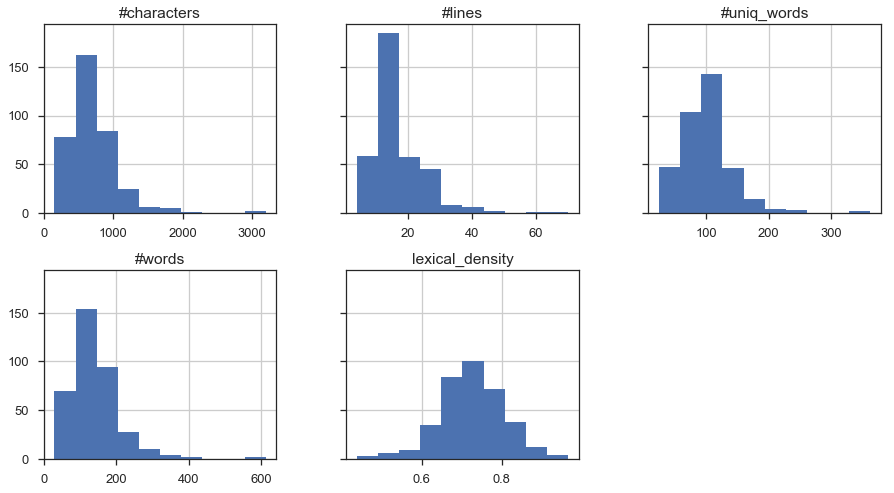

In [8]:
ye.hist(sharey=True, layout=(2, 3), figsize=(15, 8));


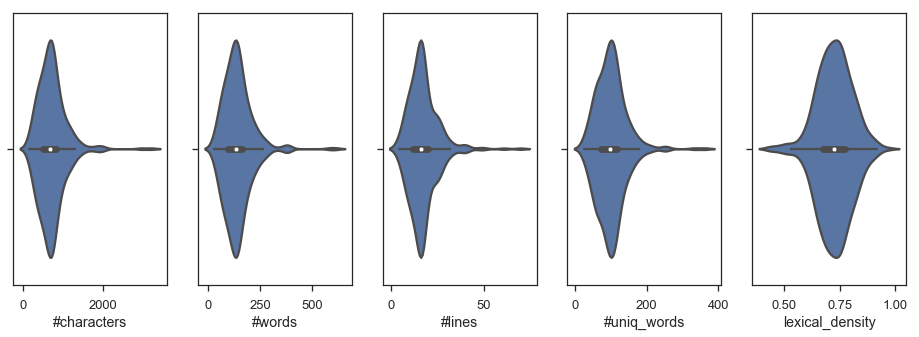

In [9]:
cols_metrics = ye.select_dtypes(include=[np.number]).columns
fig, axs = plt.subplots(ncols=len(cols_metrics), figsize=(16, 5))
for i, c in enumerate(cols_metrics):
    sns.violinplot(x=ye[c], ax=axs[i], sharex=True)

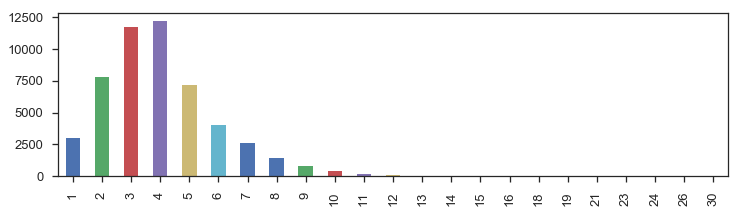

In [10]:
# Word length distribution
pd.Series(len(x) for x in ' '.join(ye.lyrics).split()).value_counts().sort_index().plot(kind='bar', figsize=(12, 3))

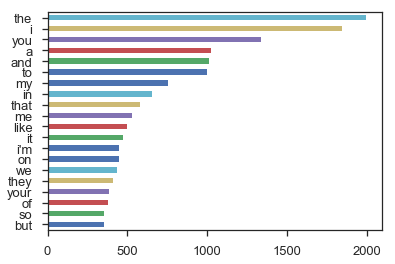

In [11]:
# top words
pd.Series(' '.join(ye.lyrics).lower().split()).value_counts()[:20][::-1].plot(kind='barh')

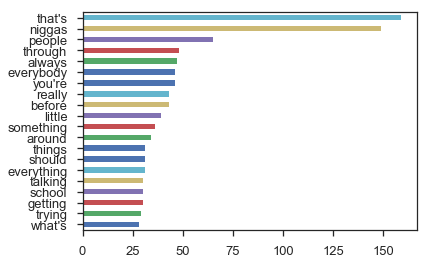

In [12]:
# top long words
pd.Series([w for w in ' '.join(ye.lyrics).lower().split() if len(w) > 5]).value_counts()[:20][::-1].plot(kind='barh')

In [13]:
from nltk import ngrams

In [14]:
def get_ngrams_from_series(series, n=2):
    # using nltk.ngrams
    lines = ' '.join(series).lower().split('\n')
    lgrams = [ngrams(l.split(), n) for l in lines]
    grams = [[' '.join(g) for g in list(lg)] for lg in lgrams]
    return [item for sublist in grams for item in sublist]

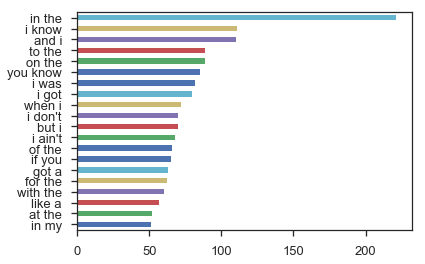

In [15]:
# Top bi-grams
pd.Series(get_ngrams_from_series(ye.lyrics, 2)).value_counts()[:20][::-1].plot(kind='barh')

/Users/Ayodele/Langs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: generator 'ngrams' raised StopIteration
  """


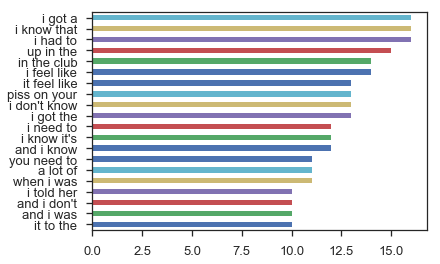

In [47]:
pd.Series(get_ngrams_from_series(ye.lyrics, 3)).value_counts()[:20][::-1].plot(kind='barh')

/Users/Ayodele/Langs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: generator 'ngrams' raised StopIteration
  """


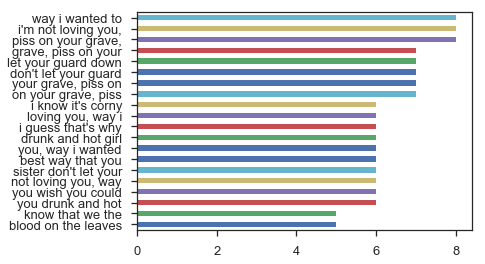

In [17]:
pd.Series(get_ngrams_from_series(ye.lyrics, 4)).value_counts()[:20][::-1].plot(kind='barh')

/Users/Ayodele/Langs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: generator 'ngrams' raised StopIteration
  """


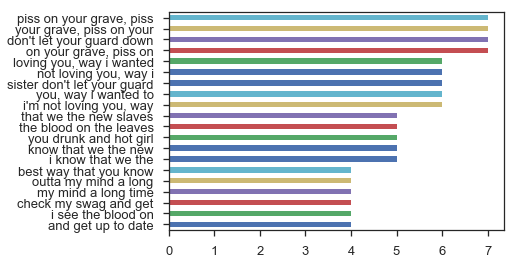

In [50]:
pd.Series(get_ngrams_from_series(ye.lyrics, 5)).value_counts()[:20][::-1].plot(kind='barh')

In [18]:
import nltk
from nltk import sentiment
nltk.download('vader_lexicon')

/Users/Ayodele/Langs/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Ayodele/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [19]:
senti_analyze = sentiment.vader.SentimentIntensityAnalyzer()


In [53]:
senti_analyze.polarity_scores(ye.lyrics[0])


{'neg': 0.153, 'neu': 0.71, 'pos': 0.137, 'compound': -0.6658}

In [54]:
ye['sentiment_score'] = pd.DataFrame(ye.lyrics.apply(senti_analyze.polarity_scores).tolist())['compound']
ye['sentiment'] = pd.cut(ye['sentiment_score'], [-np.inf, -0.35, 0.35, np.inf], labels=['negative', 'neutral', 'positive'])

In [55]:
ye.head()

,lyrics,#characters,#words,#lines,#uniq_words,lexical_density,sentiment_score,sentiment,topic
0,Let the suicide doors up\nI threw suicides on ...,675,131,16,99,0.755725,-0.6658,negative,Topic 0
1,"She said, ""'Ye, can we get married at the mall...",772,148,18,111,0.750000,-0.8690,negative,Topic 1
2,"Break records at Louis, ate breakfast at Gucci...",1479,286,33,212,0.741259,-0.9499,negative,Topic 3
3,What you doin' in the club on a Thursday?\nShe...,632,101,16,80,0.792079,-0.9900,negative,Topic 0
4,"I wanna fuck you hard on the sink\nAfter that,...",748,144,18,96,0.666667,-0.9869,negative,Topic 0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2292a668>]],
      dtype=object)

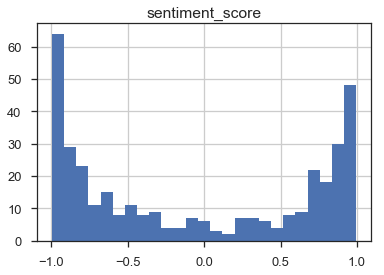

In [23]:
ye[['sentiment_score']].hist(bins=25)


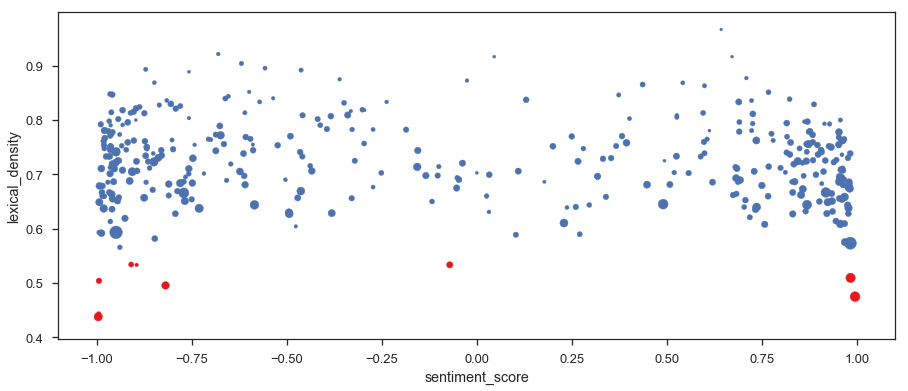

In [44]:
# Songs with lower lexical density tend to have strong sentiments
ye.plot.scatter(x='sentiment_score', y='lexical_density', s=ye['#characters']/20,
                c=np.where(ye['lexical_density'].le(0.55), '#e41a1c', '#4c72b0'),
                figsize=(15, 6))

In [46]:
# Song themes via Simplistic topic modelling

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

no_topics = 5
no_features = 50
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(ye.lyrics)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

def get_topics(model, feature_names, no_topwords):
    for topic_id, topic in enumerate(model.components_):
        print('topic %d:' % (topic_id))
        print(' '.join([feature_names[i] for i in topic.argsort()[:-no_topwords-1:-1]]))

s = pd.DataFrame(nmf.transform(tfidf)).idxmax(1)

In [34]:
# NMP topics
get_topics(nmf, tfidf_feature_names, 20)

topic 0:
know got don girl love fuck let ll baby said gotta tell bout ain shit mean want need told new
topic 1:
im niggas said bitch make good god got fuck just love bad cause shit ass need yeah new gon way
topic 2:
like black told said ll gon make hit em people feel ass girl ain got niggas love shit mean god
topic 3:
right life yeah let time look did cause good got man money need tell say feel know shit god make
topic 4:
just nigga ain man say niggas people make cause feel shit em want don way money did need time god


/Users/Ayodele/Langs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: generator 'ngrams' raised StopIteration
  """


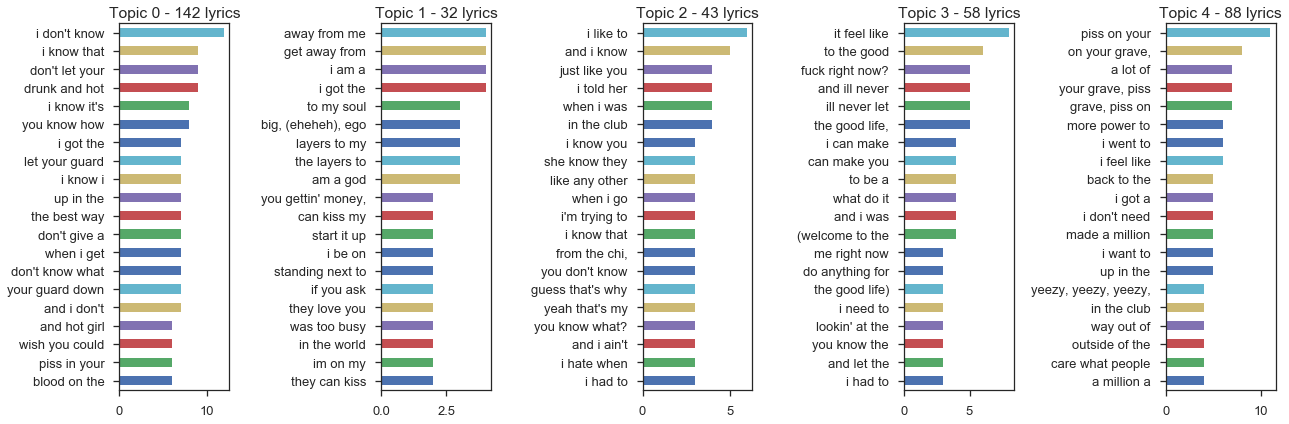

In [36]:
# Top n-grams from the topics
topics = set(s)
fig, axs = plt.subplots(figsize=(18, 6), ncols=len(topics))
for i, v in enumerate(topics):
    dfsm = ye.loc[s.eq(v), 'lyrics']
    ngram = pd.Series(get_ngrams_from_series(dfsm, 3)).value_counts()[:20][::-1]
    ngram.plot(kind='barh', ax=axs[i], title='Topic {} - {} lyrics'.format(v, s.eq(v).sum()))
plt.tight_layout()
ye['topic'] = s.astype(str).radd('Topic ')

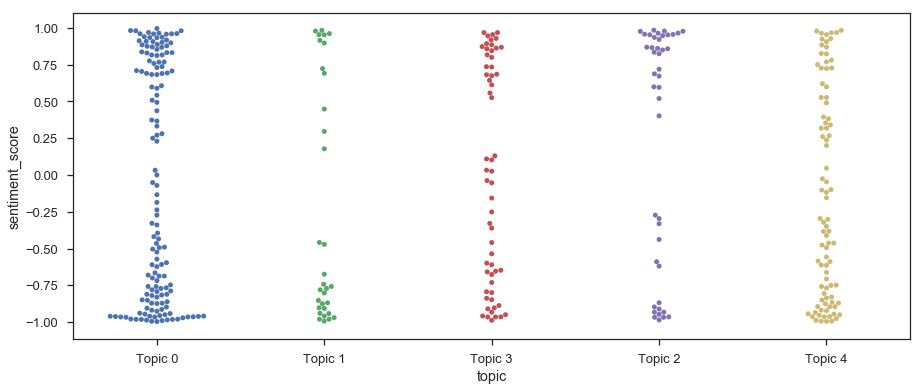

In [45]:
fig, axs = plt.subplots(figsize=(15, 6))
sns.swarmplot(x='topic', y='sentiment_score', data=ye)

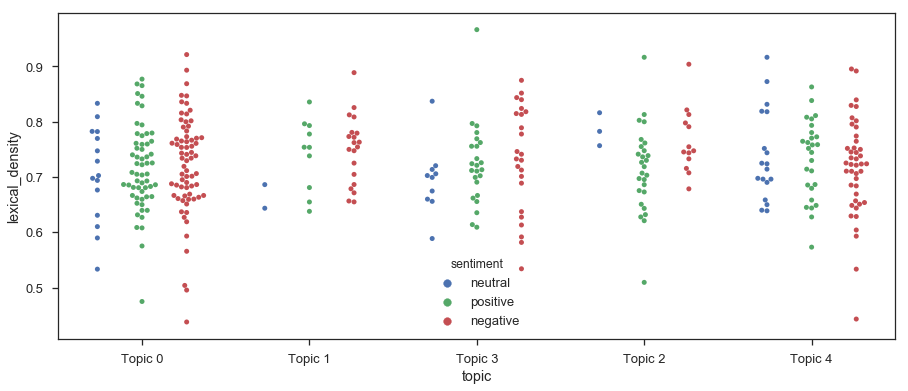

In [42]:
fig, axs = plt.subplots(figsize=(15, 6))
sns.swarmplot(x='topic', y='lexical_density', hue='sentiment',
              hue_order=['neutral', 'positive', 'negative'], data=ye, dodge=True)

In [25]:
# Machine generated lyrics using Markov
import re
import random
from collections import defaultdict


class MarkovRachaita:
    def __init__(self, corpus='', order=2, length=8):
        self.order = order
        self.length = length
        self.words = re.findall("[a-z']+", corpus.lower())
        self.states = defaultdict(list)

        for i in range(len(self.words) - self.order):
            self.states[tuple(self.words[i:i + self.order])].append(self.words[i + order])

    def gen_sentence(self, length=8, startswith=None):
        terms = None
        if startswith:
            start_seed = [x for x in self.states.keys() if startswith in x]
            if start_seed:
                terms = list(start_seed[0])
        if terms is None:
            start_seed = random.randint(0, len(self.words) - self.order)
            terms = self.words[start_seed:start_seed + self.order]

        for _ in range(length):
            terms.append(random.choice(self.states[tuple(terms[-self.order:])]))

        return ' '.join(terms)

    def gen_song(self, lines=10, length=8, length_range=None, startswith=None):
        song = []
        if startswith:
            song.append(self.gen_sentence(length=length, startswith=startswith))
            lines -= 1
        for _ in range(lines):
            sent_len = random.randint(*length_range) if length_range else length
            song.append(self.gen_sentence(length=sent_len))
        return '\n'.join(song)

In [27]:
kanyai = MarkovRachaita(corpus=' '.join(ye.lyrics))
kanyai.gen_song(lines=10, length_range=[5, 10])

"i just wanna grab a red bull and sip that twice\nmake it melt i mean damn i'm so\nprobably be cremated before i get more\nfor you you the number to dial if you uh i need\ninsecurr the concept of school i'mma take you out\nmet joseph around hella thugs cover nori in lambs' wool we\nyou baby i'm magic tada address me\nanthrax george bush told me in the children listen to that ghetto\nshots left holes in his head it's not funny anymore try different\nso hard that shit don't add up one two nigga that's mad"

In [56]:
kanyai.gen_song(lines=10, length_range=[10, 20], startswith='trump')

"donald trump taking dollars from y'all baby you're fired your\nto drop my ass up out the hotel said y'all was in hondas now\nwhere i'm headin but i got emails in my other benz throw your cash that's cake and we 'bout to go see\nfool now now he tellin' me i'm just always like to go deeper than tay\na bite or somethin i wanna dip that ass i think that pussy ain't\nchick only nigga in miami wearing winter clothes i got a blow\nall messed up a rib so mine better be prime niggas gonna kill me but if\nso we forced to sell crack rap and make up for days nike out here to convert atheists into believers i'm\ncheckin' mediatakeout pictures of me and my assistant crashed it soon as i got\nmy old bitch and i'mma never let us do our thing everybody lying on who i dont really give"

In [29]:
kanyai = MarkovRachaita(corpus=' '.join(ye.lyrics))
kanyai.gen_song(lines=10, length_range=[9, 10])

"everybody if you call upon god we trust we believe in shooting\nyears out so the lies and the beautiful house by the teachers\nin my mind a long time ive been known to cover up\nwhat you ask for it she putting on her black skin black\nmore like love to hate but babe i call back and\nand then they make noise penitentiary chances the devil is smiling\nar up we just doing what the last thing i gotta\nrapper compared to michael so here's a few hatin' ass niggas\nknow she's mine so she named her daughter alexis she had\ngood he don't like me how to moonwalk i swear my"